In [3]:
import torch
from tqdm import tqdm
from triplet_pytorch import *

In [6]:
LEARNING_RATE = 0.005
DEVICE = get_default_device()

model = ResNet_Triplet()
model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(),lr = LEARNING_RATE)
criterion = TripletLoss()

checkpoint = torch.load("trained_model.pth")

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimzier_state_dict'])


train_results = []
labels = []

model.eval()
with torch.no_grad():
    for img, _, _, label in tqdm(train_dl):
        train_results.append(model(img.to(DEVICE)).cpu().numpy())
        labels.append(label)
        
train_results = np.concatenate(train_results)
labels = np.concatenate(labels)
print(train_results.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 809/809 [03:18<00:00,  4.08it/s]

(51744, 2)


In [7]:
import matplotlib.pyplot as plt

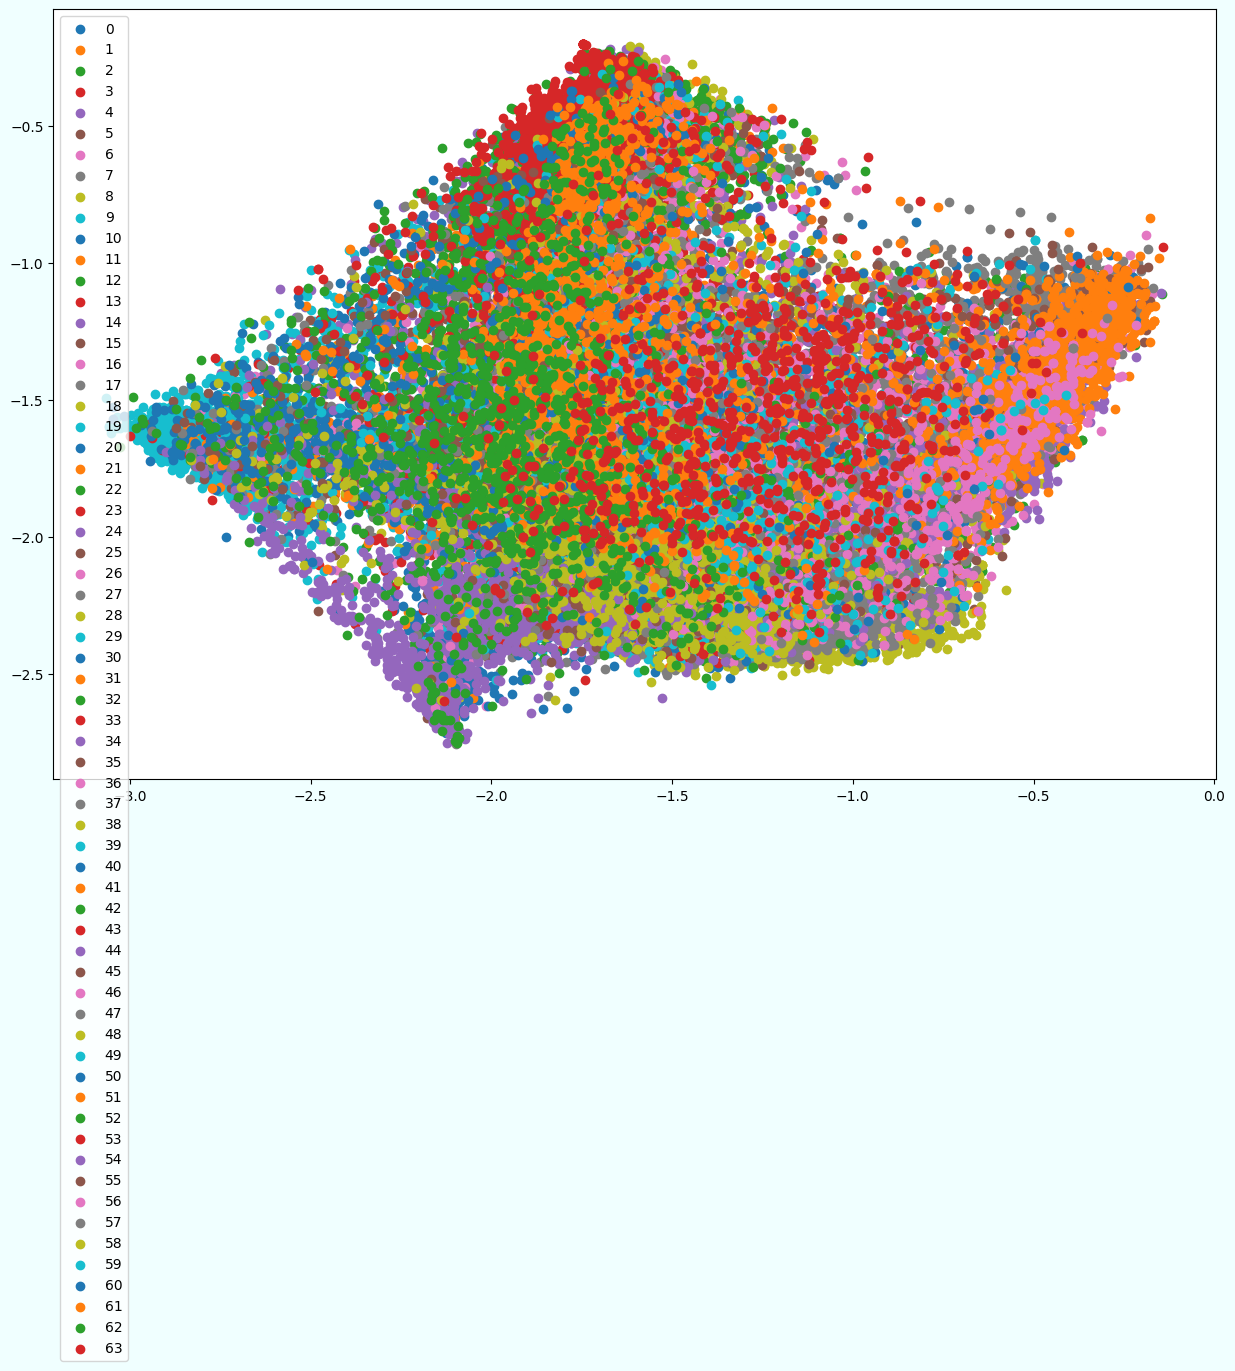

In [8]:
plt.figure(figsize=(15, 10), facecolor="azure")
for label in np.unique(labels):
    tmp = train_results[labels==label]
    plt.scatter(tmp[:, 0], tmp[:, 1], label=label)

plt.legend()
plt.show()
